In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency

In [3]:
dataset_path = "/content/drive/MyDrive/development.csv"
data = pd.read_csv(dataset_path)
X = data.drop(columns=['death', 'Id'], axis=1)
y = data['death']

In [4]:
# To delete the rows having much missing values
""" X = X[X.isnull().sum(axis=1)<12] """

' X = X[X.isnull().sum(axis=1)<12] '

In [5]:
# To delete the columns having much missing values
""" col_na = (X.isnull().sum() > int(len(X)*0.45))
col_na_names = col_na[col_na == True].index
print(col_na_names, "Length: ", len(col_na_names))

X = X.drop(columns=col_na_names, axis=1) """

' col_na = (X.isnull().sum() > int(len(X)*0.45))\ncol_na_names = col_na[col_na == True].index\nprint(col_na_names, "Length: ", len(col_na_names))\n\nX = X.drop(columns=col_na_names, axis=1) '

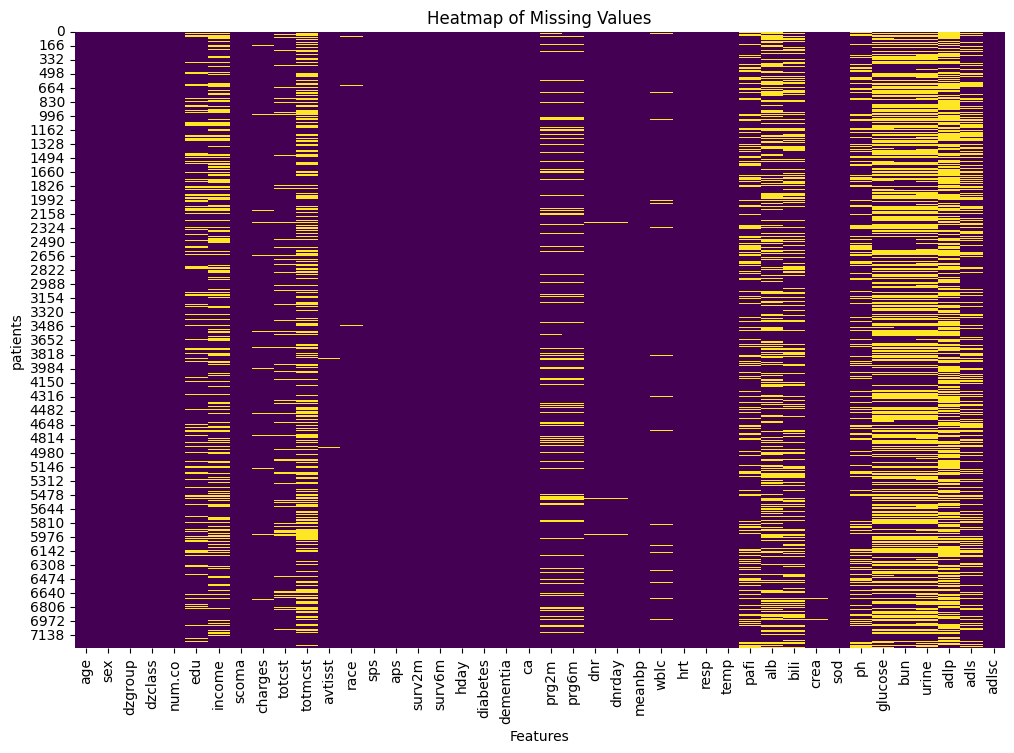

In [6]:
# Plotting Missing Value Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Features')
plt.ylabel('patients')
plt.show()


In [7]:
# Counting missing values in numerical features
missing_numerical = X.select_dtypes(include=['int64', 'float64']).isnull().sum()
print("Missing Values in Numerical Features:")
print(missing_numerical)

# Counting missing values in categorical features
missing_categorical = X.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Values in Categorical Features:")
print(missing_categorical)

Missing Values in Numerical Features:
age            0
num.co         0
edu         1315
scoma          1
charges      128
totcst       709
totmcst     2778
avtisst       66
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
prg2m       1305
prg6m       1292
dnrday        25
meanbp         0
wblc         174
hrt            0
resp           0
temp           0
pafi        1855
alb         2683
bili        2078
crea          50
sod            0
ph          1816
glucose     3593
bun         3468
urine       3877
adlp        4516
adls        2296
adlsc          0
dtype: int64

Missing Values in Categorical Features:
sex           0
dzgroup       0
dzclass       0
income     2419
race         33
ca            0
dnr          25
dtype: int64


<Axes: >

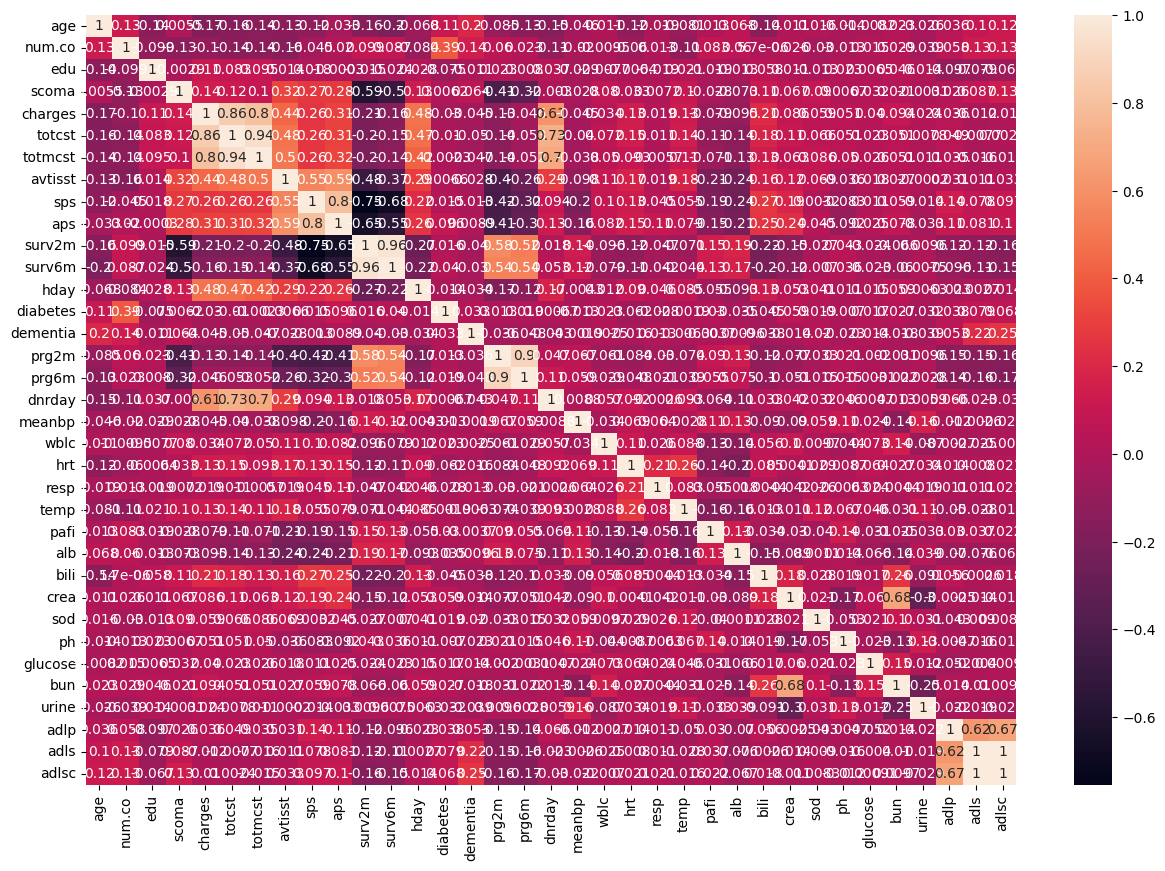

In [8]:
#Correlation heatmap for numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_corr_matrix = X[num_cols].corr()
plt.subplots(figsize=(15,10))
sns.heatmap(num_corr_matrix, xticklabels=num_corr_matrix.columns,yticklabels=num_corr_matrix.columns, annot=True)

<ipython-input-9-8504705605f8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x=col, palette='viridis', order=X[col].value_counts().index, ax=axes[i])
<ipython-input-9-8504705605f8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x=col, palette='viridis', order=X[col].value_counts().index, ax=axes[i])
<ipython-input-9-8504705605f8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x=col, palette='viridis', order=X[col].value_counts().index, ax=axes[i])
<ipython-input-9-8504705605f8>:13: FutureWarning: 

Pas

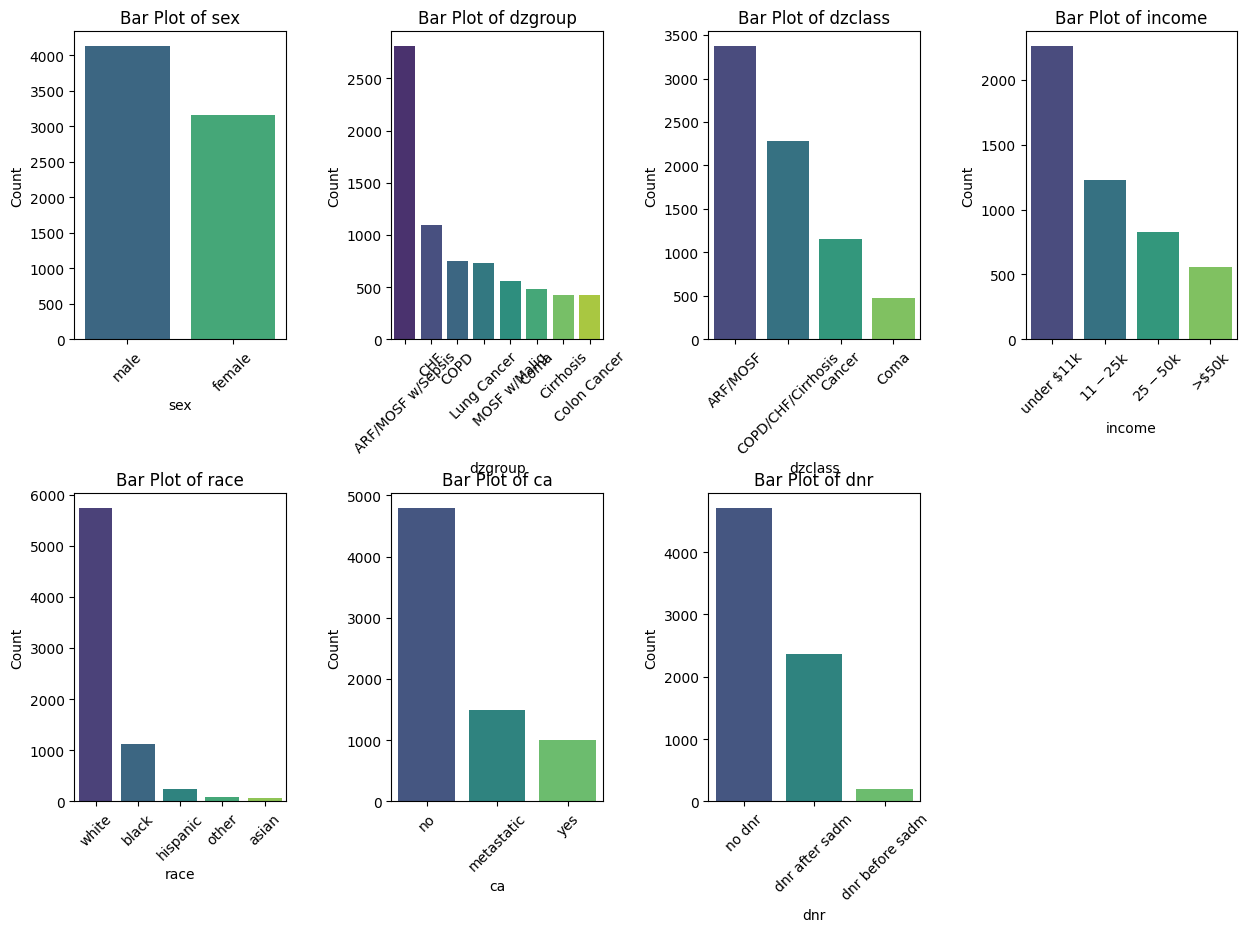

In [9]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

num_plots = len(cat_cols)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=X, x=col, palette='viridis', order=X[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

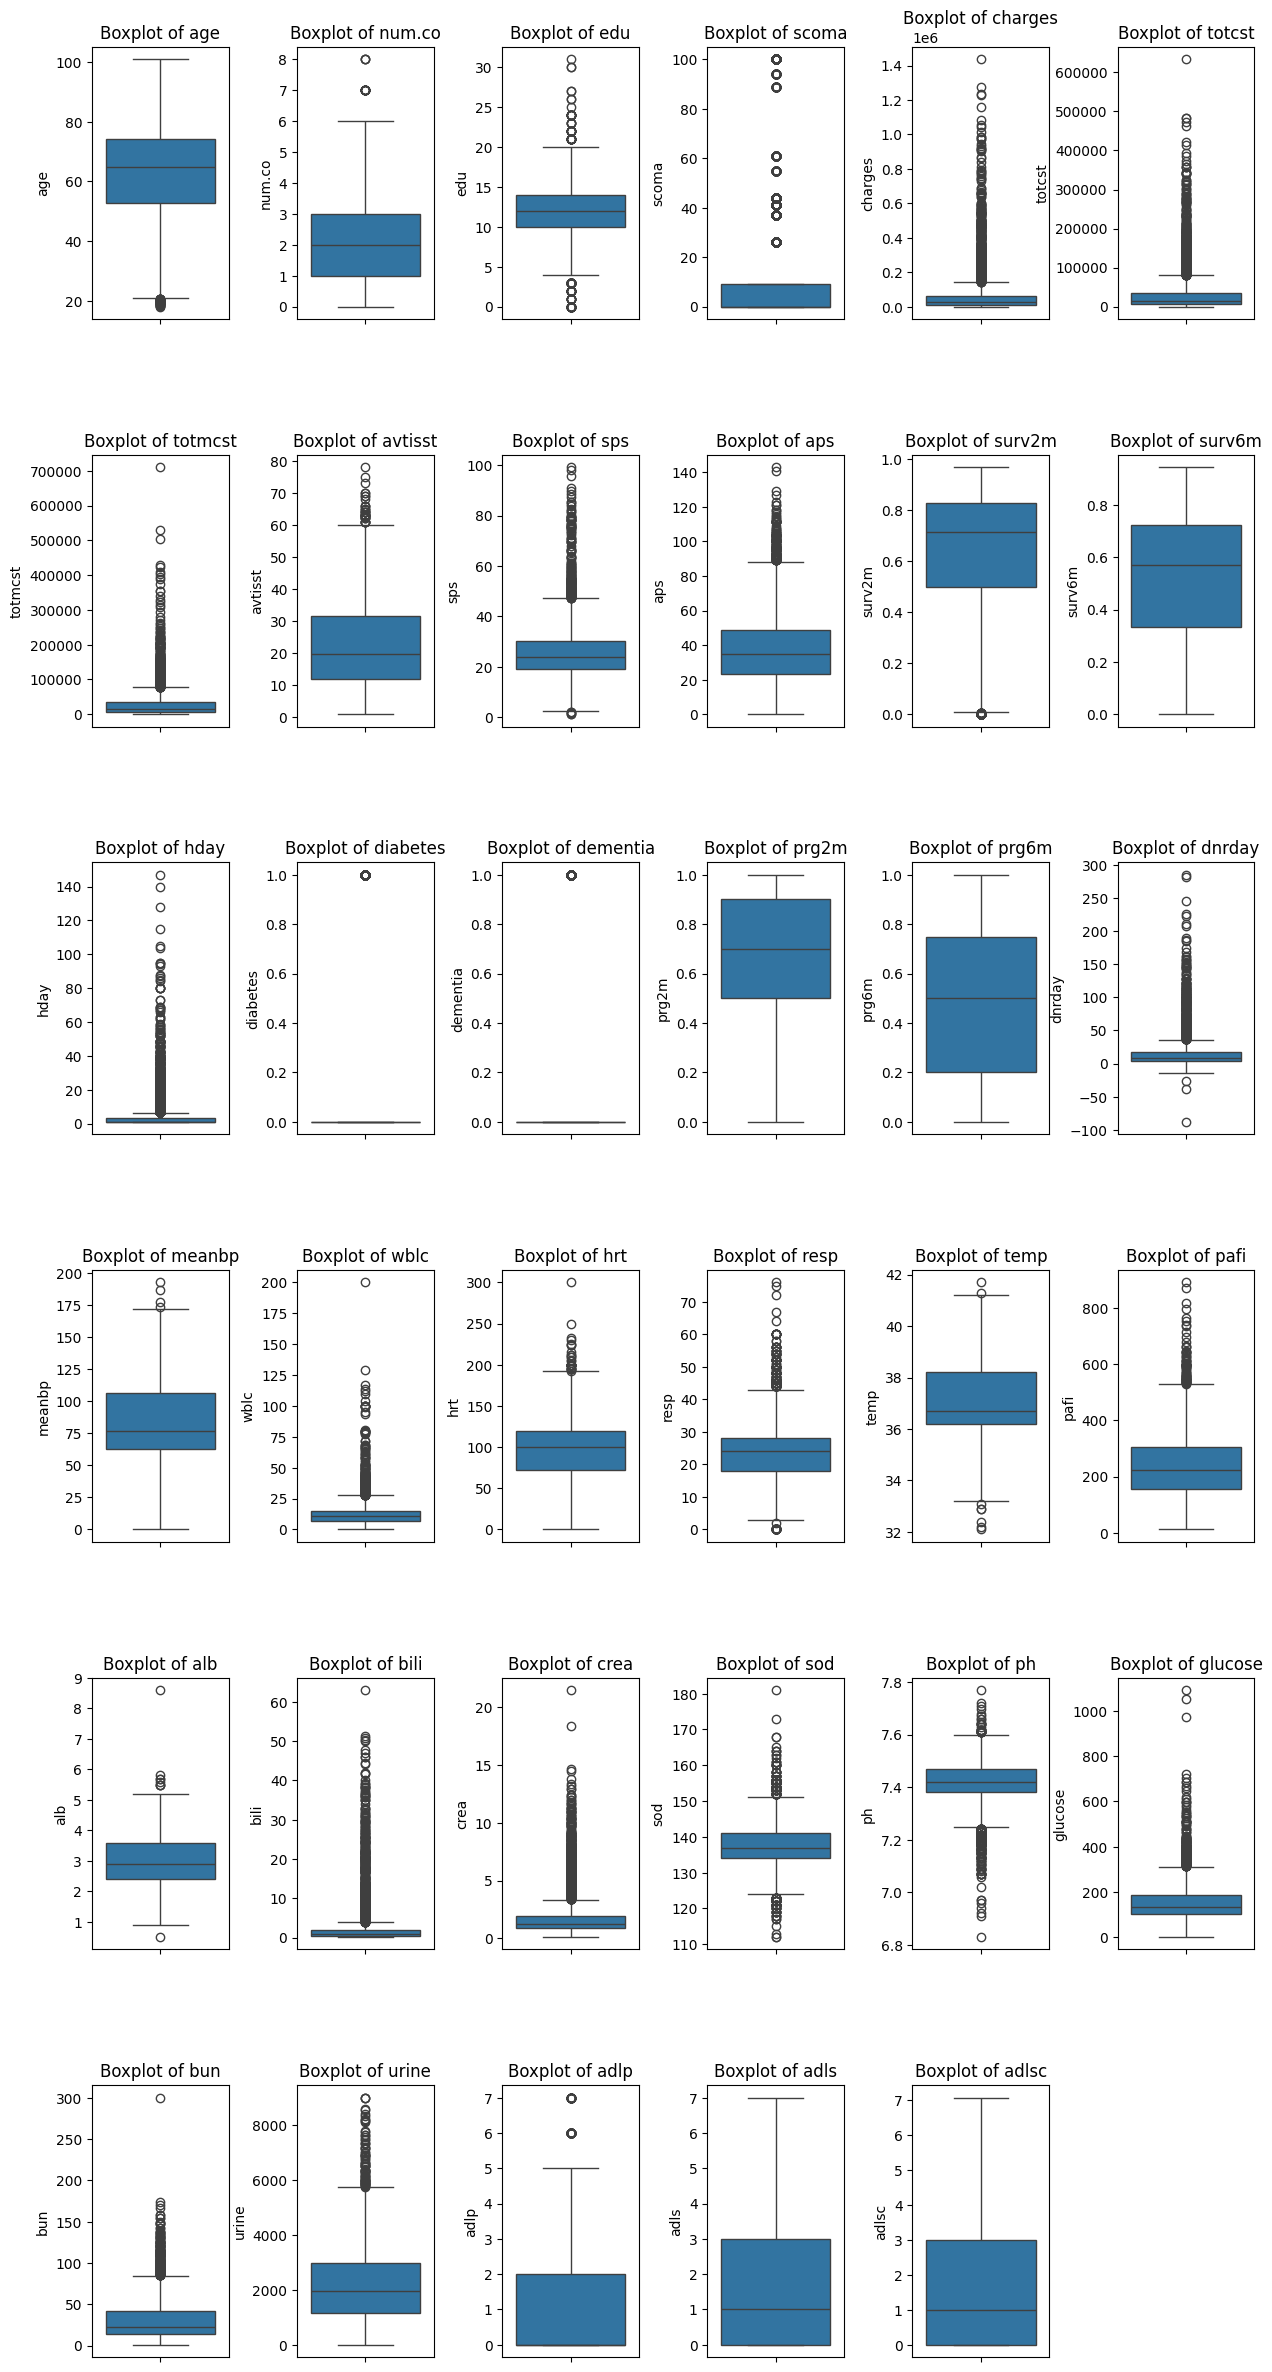

In [10]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_plots = len(num_cols)
num_cols_in_fig = 6
num_rows = math.ceil(num_plots / num_cols_in_fig)

fig, axes = plt.subplots(num_rows, num_cols_in_fig, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=X, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [11]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers_dict = {}

for col in num_cols:
    outliers_dict[col] = find_outliers(X, col)

for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

Outliers in age:
           age     sex            dzgroup             dzclass  num.co   edu  \
177   20.76700  female       MOSF w/Malig            ARF/MOSF       1  14.0   
305   18.11899    male       MOSF w/Malig            ARF/MOSF       2  12.0   
350   18.18999  female               Coma                Coma       0  11.0   
560   18.75400  female  ARF/MOSF w/Sepsis            ARF/MOSF       0  13.0   
613   20.24399    male                CHF  COPD/CHF/Cirrhosis       2  12.0   
671   20.05199  female          Cirrhosis  COPD/CHF/Cirrhosis       1  13.0   
1038  20.73099    male  ARF/MOSF w/Sepsis            ARF/MOSF       0  12.0   
1236  19.86600  female                CHF  COPD/CHF/Cirrhosis       1  11.0   
1261  20.09599  female                CHF  COPD/CHF/Cirrhosis       3  12.0   
1353  20.52300    male       MOSF w/Malig            ARF/MOSF       4   NaN   
1725  18.50200  female  ARF/MOSF w/Sepsis            ARF/MOSF       0  10.0   
1931  20.48199    male  ARF/MOSF w/

In [12]:
display(X.columns)

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma',
       'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m',
       'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
       'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine',
       'adlp', 'adls', 'adlsc'],
      dtype='object')

In [13]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [14]:
display(cat_cols)

Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr'], dtype='object')

In [15]:
display(num_cols)

Index(['age', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'totmcst',
       'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes',
       'dementia', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp',
       'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun',
       'urine', 'adlp', 'adls', 'adlsc'],
      dtype='object')

In [22]:
# Splitting the development.csv dataset into 2 sections, to forecast and impute the missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=111)

In [23]:
num_pipeline = Pipeline([
    # ('imputer', SimpleImputer(strategy='mean')),
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

In [24]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
class RandomForestImputer(BaseEstimator, TransformerMixin):
    def __init__(self, is_categorical=True, random_state=None):
        self.is_categorical = is_categorical
        self.random_state = random_state
        if self.is_categorical:
            self.rf = RandomForestClassifier(n_estimators=100, random_state=self.random_state)
        else:
            self.rf = RandomForestRegressor(n_estimators=100, random_state=self.random_state)

    def fit(self, X, y=None):
        mask = X.notnull()
        if self.is_categorical:
            self.rf.fit(X[mask].values.reshape(-1, 1), y[mask])
        else:
            self.rf.fit(X[mask], y[mask])
        return self

    def transform(self, X):
        mask = X.isnull()
        if self.is_categorical:
            X_missing = X[mask].values.reshape(-1, 1)
        else:
            X_missing = X[mask]
        X.loc[mask] = self.rf.predict(X_missing)
        return X

In [25]:
cat_pipeline = Pipeline([
    #('imputer', RandomForestImputer(is_categorical=True, random_state=124)),
    #('imputer', RandomForestClassifier(n_estimators=100, random_state=124)),
    #('imputer', KNNImputer(n_neighbors=5)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))

])

In [26]:
# Combining preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

X_preprocessed = preprocessor.fit_transform(X)

In [28]:
# Using ensemble method
rf_model = RandomForestClassifier(criterion='gini', random_state=21)
gb_model = GradientBoostingClassifier(random_state=124)
#svc_model = SVC(probability=True, random_state=124)
#knn_model = KNeighborsClassifier()

voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
#    ('svc', svc_model),
#    ('knn', knn_model)
], voting='hard')

#rf_model.fit(X_preprocessed, y)
#gb_model.fit(X_preprocessed, y)
#svc_model.fit(X_preprocessed, y)
#knn_model.fit(X_preprocessed, y)
voting_model.fit(X_preprocessed, y)

test_dataset_path = "/content/drive/MyDrive/evaluation.csv"
test_df = pd.read_csv(test_dataset_path) #.drop(columns=col_na_names)
evaluation_df = test_df.drop(columns='Id')

X_eval = preprocessor.transform(evaluation_df)

eval_predictions = voting_model.predict(X_eval)

submission = pd.DataFrame({'Id': test_df['Id'], 'Predicted': eval_predictions})
submission.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')

#F1-Score : 0.766

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ensemble models using hyperparameter tuning for random forest
rf_model = RandomForestClassifier(random_state=124)
gb_model = GradientBoostingClassifier(random_state=124)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

X_train_preprocessed = preprocessor.fit_transform(X_train)

rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train_preprocessed, y_train)
best_rf_model = rf_grid_search.best_estimator_

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(gb_model, gb_params, cv=5, scoring='f1', n_jobs=-1)
gb_grid_search.fit(X_train_preprocessed, y_train)
best_gb_model = gb_grid_search.best_estimator_

voting_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('gb', best_gb_model)
], voting='hard')

voting_model.fit(X_preprocessed, y)

test_dataset_path = "/content/drive/MyDrive/evaluation.csv"
test_df = pd.read_csv(test_dataset_path) #.drop(columns=col_na_names)
evaluation_df = test_df.drop(columns='Id')

X_eval = preprocessor.transform(evaluation_df)

eval_predictions = voting_model.predict(X_eval)

submission = pd.DataFrame({'Id': test_df['Id'], 'Predicted': eval_predictions})
submission.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')

#F1-Score : 0.759

In [ ]:
# Using ensemble models
rf_model = RandomForestClassifier(random_state=0)
gb_model = GradientBoostingClassifier(random_state=0)
xgb_model = XGBClassifier(random_state=0)

voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
], voting='hard')

voting_model.fit(X_preprocessed, y)

test_dataset_path = "/content/drive/MyDrive/evaluation.csv"
test_df = pd.read_csv(test_dataset_path) #.drop(columns=col_na_names)
evaluation_df = test_df.drop(columns='Id')

X_eval = preprocessor.transform(evaluation_df)
eval_predictions = voting_model.predict(X_eval)

submission = pd.DataFrame({'Id': evaluation_df['Id'], 'Predicted': eval_predictions})
submission.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')

In [ ]:
# Model Pipeline using XGBoost
model_pipeline = Pipeline([
     ('feature_selection', SelectKBest(mutual_info_classif, k=20)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='gini'))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_preprocessed, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

y_pred = best_model.predict(X_preprocessed)
print(classification_report(y_test, y_pred))

Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Cross-validation Accuracy: 0.7640299024418404
              precision    recall  f1-score   support

           0       0.68      0.54      0.60       683
           1       0.81      0.88      0.84      1503

    accuracy                           0.78      2186
   macro avg       0.74      0.71      0.72      2186
weighted avg       0.77      0.78      0.77      2186



In [ ]:
test_dataset_path = "/content/drive/MyDrive/evaluation.csv"
test_df = pd.read_csv(test_dataset_path) #.drop(columns=col_na_names)
evaluation_df = test_df.drop(columns='Id')

testData_preprocessed = preprocessor.transform(evaluation_df)
y_pred_test = best_model.predict(testData_preprocessed)

submission = pd.DataFrame({'Id': test_df['Id'], 'Predicted': eval_predictions})
submission.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')